In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("cumulative.csv")
df = df.drop(columns=["rowid", "kepid", "kepoi_name", "kepler_name", "koi_pdisposition", "koi_score", "koi_tce_delivname"])
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,FALSE POSITIVE,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,CONFIRMED,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [5]:
# Determined that there is no need to break out the dataframe in binary as the "Y" has the alpha.  
# If the alpha was in the "x", the would need to break that out or use the "One Hot Encoding" and put into an array.
# exoplanet_df = pd.get_dummies(df)
# exoplanet_df.head()

In [8]:
X = df.drop("koi_disposition", axis=1)
# y = exoplanet_df["koi_disposition_CONFIRMED"].values.reshape(-1, 1)
y = df["koi_disposition"]

print(X.shape, y.shape)

(8744, 40) (8744,)


In [9]:
# y_data = y.copy()

# y_data_binary_encoded = pd.get_dummies(y_data, columns=["koi_disposition"])
# y_data_binary_encoded.head()

# Create a Train Test Split

Use `koi_disposition` for the y values

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
# from tensorflow.keras.utils import to_categorical

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1, stratify=y)

In [12]:
X_train.head()
# X_test.head()
# y_train.head()
# y_test.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
5964,1,0,0,0,252.044440,0.027490,-0.027490,265.2010,0.0494,-0.0494,...,-136.0,4.621,0.041,-0.035,0.664,0.057,-0.059,292.79022,41.948639,15.884
9410,1,0,0,0,371.518520,0.015790,-0.015790,317.6836,0.0339,-0.0339,...,-206.0,4.377,0.101,-0.203,1.089,0.364,-0.145,293.06400,45.034210,13.731
4204,0,0,1,0,8.038670,0.000114,-0.000114,135.3098,0.0123,-0.0123,...,-181.0,4.485,0.050,-0.200,0.975,0.282,-0.101,290.51785,41.238762,14.999
5933,0,0,0,0,18.782160,0.000406,-0.000406,147.8508,0.0148,-0.0148,...,-167.0,4.488,0.048,-0.290,0.940,0.386,-0.087,291.76413,41.860130,14.043
6996,1,0,1,0,12.429716,0.000472,-0.000472,141.2846,0.0420,-0.0420,...,-200.0,4.534,0.037,-0.213,0.905,0.281,-0.088,297.52072,40.585419,15.842


# Pre-processing

Scale the data using the MinMaxScaler

In [13]:
# from sklearn.preprocessing import StandardScaler
# X_scaler = StandardScaler().fit(X_train)
# y_scaler = StandardScaler().fit(y_train)
# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)
# y_train_scaled = y_scaler.transform(y_train)
# y_test_scaled = y_scaler.transform(y_test)

X_scaler = MinMaxScaler().fit(X_train)
# y_scaler = MinMaxScaler().fit(y_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
# y_train_scaled = y_scaler.transform(y_train)
# y_test_scaled = y_scaler.transform(y_test)

# Step 1: Label-encode data set
# label_encoder = LabelEncoder()
# label_encoder.fit(y_train)
# encoded_y_train = label_encoder.transform(y_train)
# encoded_y_test = label_encoder.transform(y_test)

# Step 2: Convert encoded labels to one-hot-encoding
# y_train_categorical = to_categorical(encoded_y_train)
# y_test_categorical = to_categorical(encoded_y_test)

C:\Users\aa11717\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


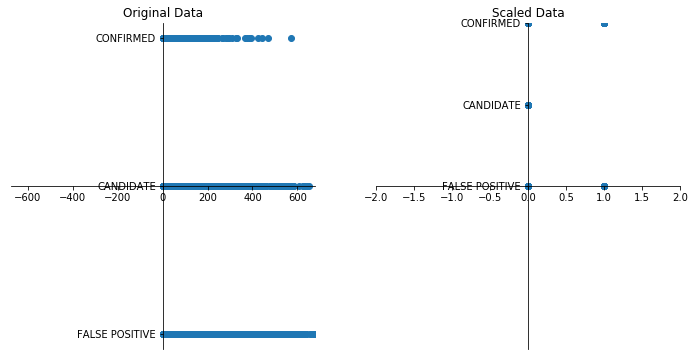

In [14]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["koi_period"].max()
# maxy = y_train.max()
# maxy = y_train
axes1.set_xlim(-maxx + 1, maxx + 1)
# axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["koi_period"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train[:])

# Train the Support Vector Machine

In [15]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [20]:
print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

Training Data Score: 0.8479719426654467
Testing Data Score: 0.8462946020128088


In [21]:
# Calculate classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test_scaled)
print(classification_report(y_test, predictions,
                            target_names=["blue", "red", "green"]))

              precision    recall  f1-score   support

        blue       0.76      0.57      0.65       528
         red       0.68      0.81      0.74       568
       green       0.98      1.00      0.99      1090

   micro avg       0.85      0.85      0.85      2186
   macro avg       0.81      0.79      0.79      2186
weighted avg       0.85      0.85      0.84      2186



# Hyperparameter Tuning

Use `GridSearchCV` to tune the `C` and `gamma` parameters

In [22]:
# Create the GridSearchCV model
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.0001, 0.001, 0.01]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [23]:
# Train the model with GridSearch
# Fit the model using the grid search estimator. 
# This will take the SVC model and try each combination of parameters
grid.fit(X_train_scaled, y_train)

C:\Users\aa11717\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] C=1, gamma=0.0001 ...............................................
[CV] ...... C=1, gamma=0.0001, score=0.8399634202103338, total=   0.5s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] ...... C=1, gamma=0.0001, score=0.8508691674290942, total=   0.4s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


[CV] ...... C=1, gamma=0.0001, score=0.8361556064073227, total=   0.4s
[CV] C=1, gamma=0.001 ................................................
[CV] ....... C=1, gamma=0.001, score=0.8399634202103338, total=   0.5s
[CV] C=1, gamma=0.001 ................................................
[CV] ....... C=1, gamma=0.001, score=0.8508691674290942, total=   0.4s
[CV] C=1, gamma=0.001 ................................................
[CV] ....... C=1, gamma=0.001, score=0.8361556064073227, total=   0.4s
[CV] C=1, gamma=0.01 .................................................
[CV] ........ C=1, gamma=0.01, score=0.8399634202103338, total=   0.5s
[CV] C=1, gamma=0.01 .................................................
[CV] ........ C=1, gamma=0.01, score=0.8508691674290942, total=   0.4s
[CV] C=1, gamma=0.01 .................................................
[CV] ........ C=1, gamma=0.01, score=0.8361556064073227, total=   0.5s
[CV] C=5, gamma=0.0001 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   23.5s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 5, 10], 'gamma': [0.0001, 0.001, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [24]:
# List the best parameters for this dataset
print(grid.best_params_)
print(grid.best_score_)

{'C': 10, 'gamma': 0.0001}
0.8690149435803599


In [25]:
# Make predictions with the hypertuned model
predictions = grid.predict(X_test_scaled)

In [27]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["blue", "red", "green"]))

              precision    recall  f1-score   support

        blue       0.83      0.64      0.73       528
         red       0.73      0.86      0.79       568
       green       0.98      1.00      0.99      1090

   micro avg       0.88      0.88      0.88      2186
   macro avg       0.85      0.83      0.83      2186
weighted avg       0.88      0.88      0.87      2186

